In [31]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from collections import Counter
import seaborn as sns
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/tsne/tsne_scores.csv")

In [32]:
df

,t-SNE-1,t-SNE-2
0,10.846841,-16.712580
1,24.794334,-16.775398
2,2.953309,13.379048
3,27.262146,-31.886690
4,-23.015728,64.468376
...,...,...
4401,-15.211057,-69.717155
4402,-9.403443,-62.847458
4403,-17.546083,-10.295582
4404,-8.512799,16.375420


In [33]:
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 5).fit(df)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

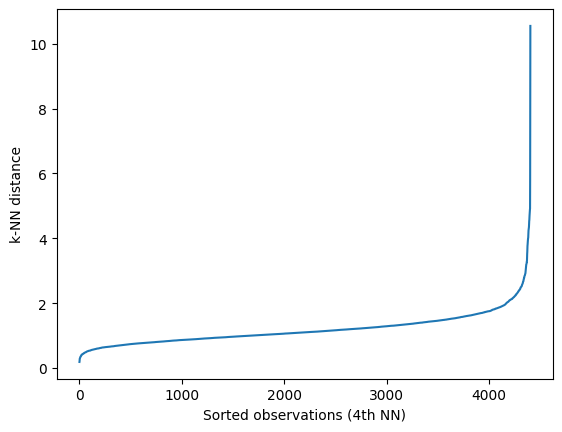

In [34]:
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [35]:
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

4.5445133515748894


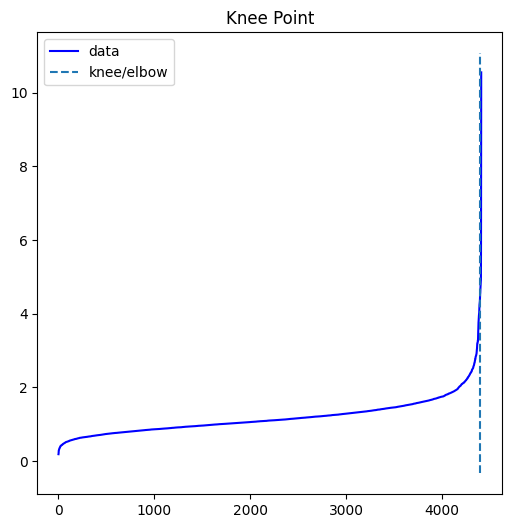

In [36]:
kneedle.plot_knee()
plt.show()

In [37]:
clusters = DBSCAN(eps = 4.54, min_samples = 4).fit(df)
# get cluster labels
clusters.labels_
# output

# check unique clusters
set(clusters.labels_)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [38]:
Counter(clusters.labels_)

Counter({0: 870,
         1: 1524,
         2: 769,
         3: 301,
         4: 153,
         5: 246,
         6: 232,
         7: 283,
         8: 11,
         9: 6,
         10: 8,
         -1: 3})

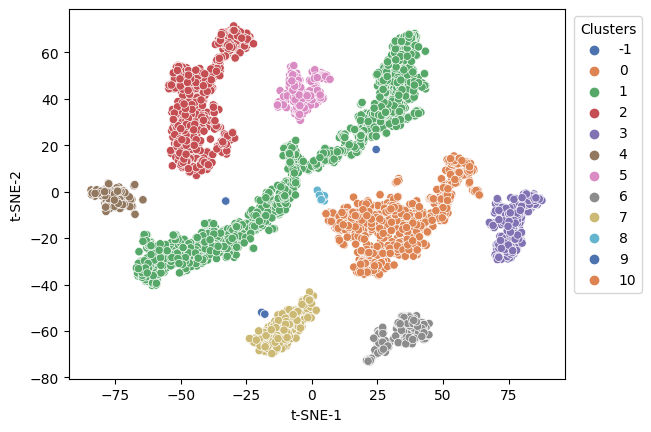

In [39]:
p = sns.scatterplot(data = df, x = "t-SNE-1", y = "t-SNE-2", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()